## **MEDICAL COST ANALYSİS**



Dataset: https://www.kaggle.com/datasets/mirichoi0218/insurance

In this project, you will be trying to develop an end-to-end data science application using the
dataset given above. The aim of the project is to estimate the approximate cost of a person's
health insurance based on the given variables.

In [71]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
from scipy.stats import pearsonr



In [72]:
# Read the "insurance.csv" file
data=pd.read_csv('insurance.csv')

In [73]:
#copying the dataframe
insurance_df=data.copy()

In [74]:
# Use the head() function to display the first 5 rows of the data
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [75]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [76]:
#for observating the statistical methods
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**EXPLOTARATORY DATA ANALYSIS**

In [77]:
#Checking for null or missing  values
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [78]:
#Checking number of unique value in each feature
insurance_df.nunique().sort_values(ascending=False)

charges     1337
bmi          548
age           47
children       6
region         4
sex            2
smoker         2
dtype: int64

**Examine the distribution of Bmi (Body Mass Index)**

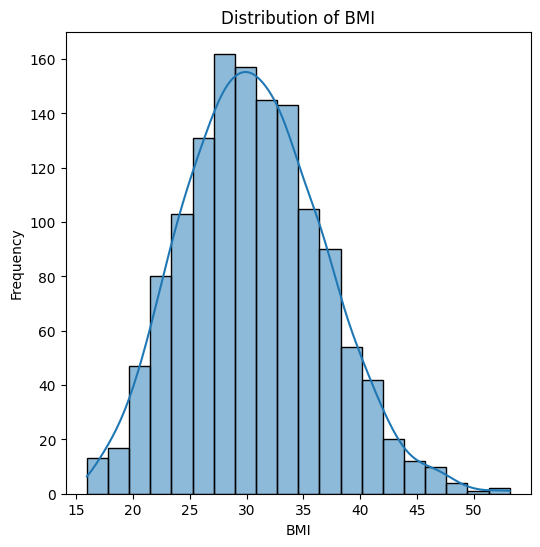

In [79]:
# Examine the distribution of BMI with histogram plot
plt.figure(figsize=(6, 6))#creating a figure
sns.histplot(insurance_df['bmi'],kde = True,bins=20) #creating a histogram plot and add bins to it
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

*As seen in the distribution table, we see the highest frequency between 25-35 bmi.* *The part where it is 30 bmi is the part with the highest frequency value in our distribution plot. Also, by adding a KDE plot to the histogram plot, the distribution is seen more clearly.*



**Examine the relationship between “smoker” and “charges”**

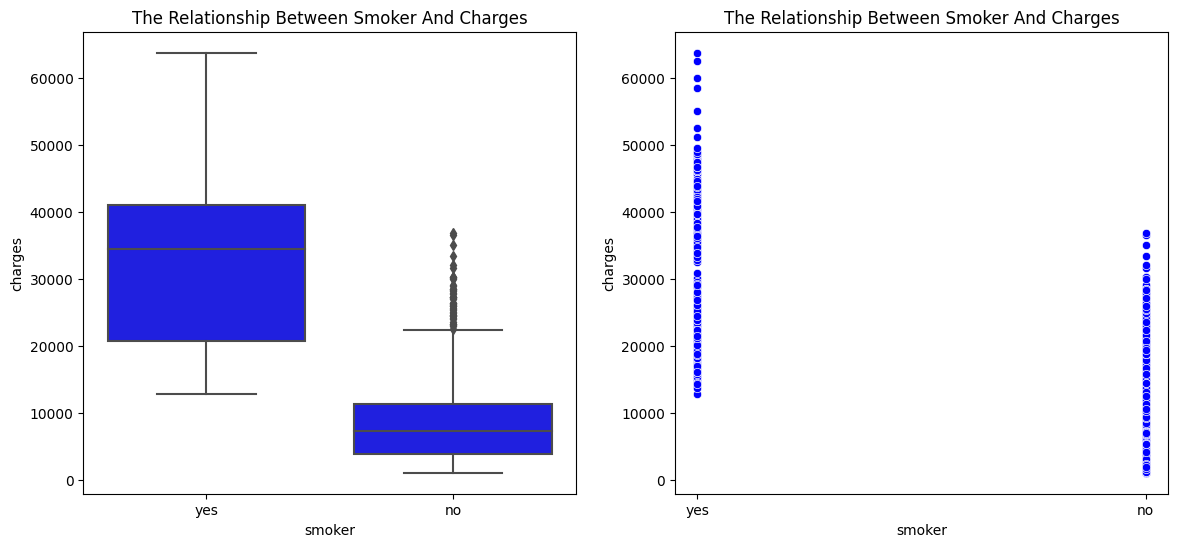

In [80]:
#examining between smoker and charges using with boxplot
fig=plt.figure(figsize=(14,6))
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)
#Subplot1:Boxplot
sns.boxplot(data=insurance_df,x='smoker',y='charges',color='blue',ax=ax0)
ax0.set_title('The Relationship Between Smoker And Charges')
#Subplot2:Scatterplot
sns.scatterplot(data=insurance_df,x='smoker',y='charges',color='blue',ax=ax1);
ax1.set_title('The Relationship Between Smoker And Charges');

*According to our findings,Smokers often seem to pay higher charges* *rather than non-smokers*

*We can immediately make a few key observations from the plots above:*

*1.The minimum number of smokers is around 1500 (min), maximum number is around higher than 6000 (max), and median number of immigrants is around between 3000 and 4000 (median).

*.The minimum number of non-smokers is around ~300 or fewer (min), maximum number is around  ~2200 or fewer (max), and median number of immigrants is around ~600 or fewer (median).*



In [81]:
#grouping by region
df_region=insurance_df.groupby('region')['smoker'].value_counts()

df_region_unstack=df_region.unstack()
df_region_unstack

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


**Examine the relationship between “smoker” and “region”.**

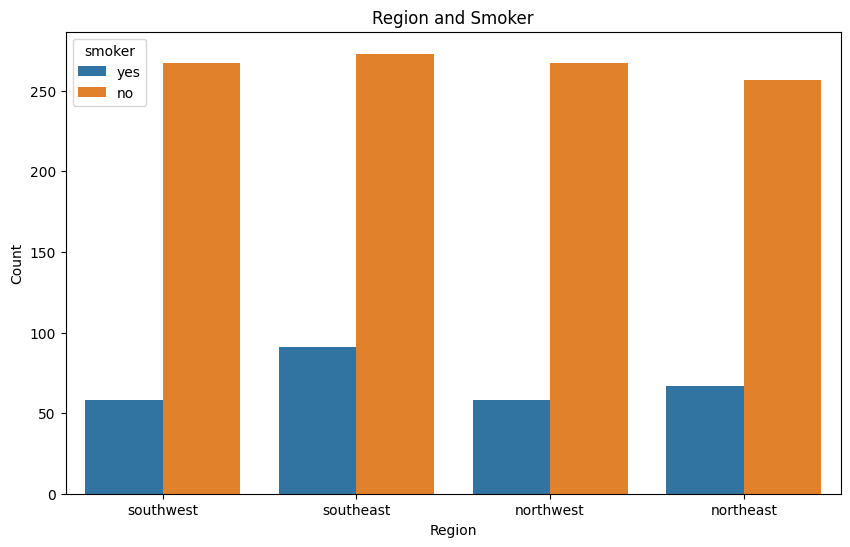

In [82]:
plt.figure(figsize=(10,6))
sns.countplot(data=insurance_df, x='region', hue='smoker')
plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Region and Smoker")
plt.show()

**Examine the relationship between “bmi” and “sex”.**

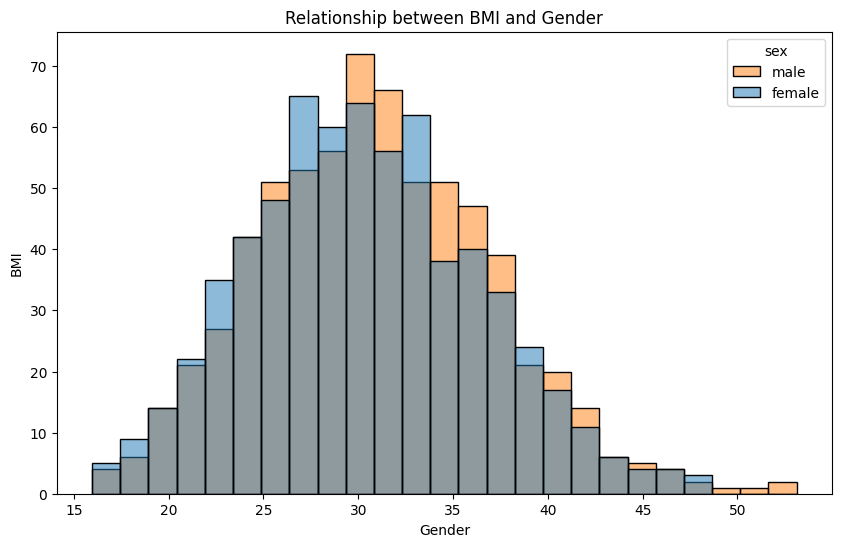

In [83]:
#create a histogram plot for affect of gender on bmi
plt.figure(figsize=(10, 6))
sns.histplot(data=insurance_df,x=insurance_df['bmi'],hue=insurance_df['sex'])
plt.title('Relationship between BMI and Gender')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.legend(title='sex',labels=['male','female'])
plt.show()

We observed that the BMI distribution was different according to the genders.
Statistical analyzes evaluated whether there was a significant difference between the means of Body Mass Index between genders. This difference may require further research on how health and lifestyle factors are affected by gender.

In conclusion, the relationship between gender and Body Mass Index is complex and multifaceted. Further data analysis and in-depth research into health factors may be required to better understand this relationship.

**Find the "region" with the most "children".**

In [84]:
most_children_region = data.groupby('region')['children'].sum().idxmax()
print("Region with the most children:", most_children_region)

Region with the most children: southeast


In [85]:
df_most=insurance_df.groupby('region',axis=0).sum()
df_most

<ipython-input-85-fe572e39622f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_most=insurance_df.groupby('region',axis=0).sum()


,age,bmi,children,charges
region,,,,
northeast,12723,9452.215,339,4.343669e+06
northwest,12739,9489.930,373,4.035712e+06
southeast,14174,12141.580,382,5.363690e+06
southwest,12823,9943.900,371,4.012755e+06


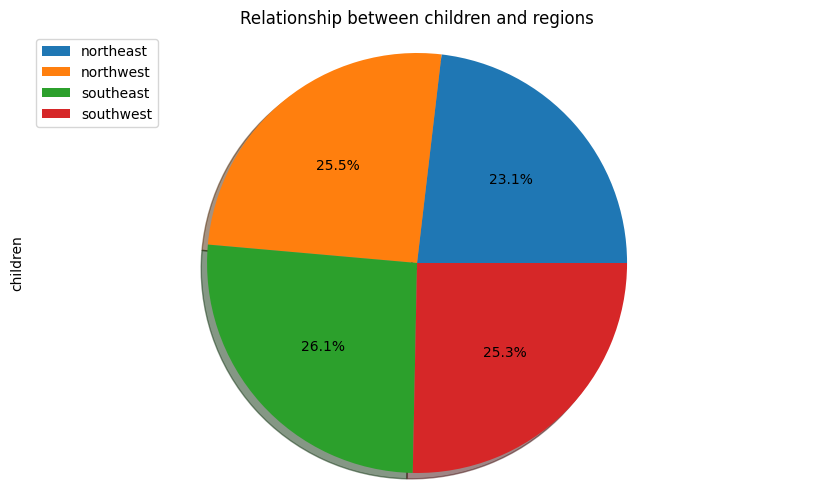

In [86]:
explode_list = [0, 0, 0, 0.2, 0] # ratio for each continent with which to offset each wedge.
# autopct create %, start angle represent starting point
df_most['children'].plot(kind='pie',
                          figsize=(10, 6),
                          autopct='%1.1f%%', # add in percentages
                          shadow=True,# add shadow
                          labels=None,
                          #explode=explode_list #exploding the most value on chart
                          );

plt.title('Relationship between children and regions')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df_most.index, loc='upper left')


plt.show()


*According to pie chart,It is show that region with the most children are 26.1% in southeast*

In [87]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Examine the relationship between “age” and “bmi”.**

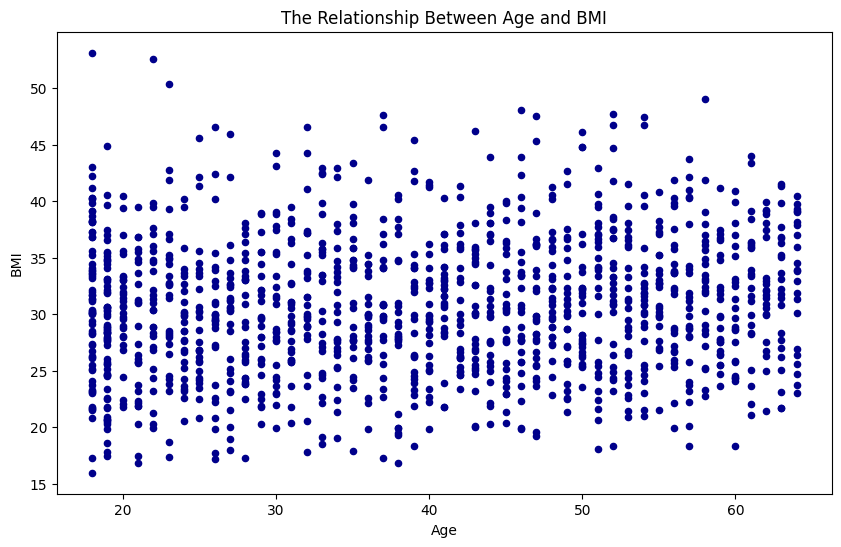

In [88]:
insurance_df.plot(kind='scatter', x='age', y='bmi', figsize=(10, 6), color='darkblue')

plt.title('The Relationship Between Age and BMI')
plt.xlabel('Age')
plt.ylabel('BMI')

plt.show()

In [89]:
#observating pearsonr method for correlation between age and bmi
pearson_coef,p_value=pearsonr(insurance_df['age'],insurance_df['bmi'])
pearson_coef,p_value

(0.10927188154853519, 6.194289065049109e-05)

*Based on our analysis, we could not identify a significant relationship between age and Body Mass Index (BMI). Scatter plot visualization and statistical calculations indicated that age does not have a dominant or significant effect on BMI. The Pearson correlation coefficient also showed a low or insignificant value.*

**Examine the relationship between “bmi” and “children”.**

In [90]:
insurance_df['children'].nunique()

6

In [91]:
insurance_df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

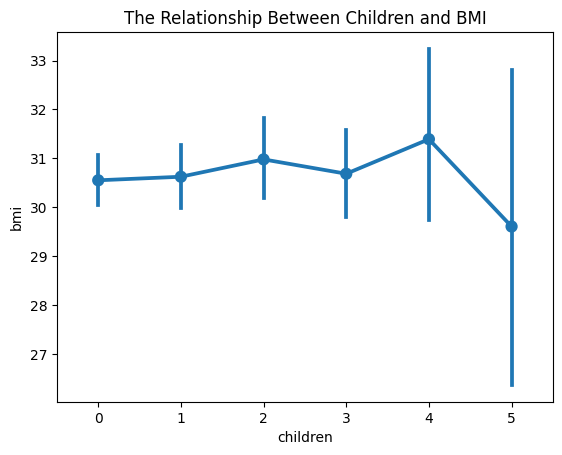

In [92]:
# creating pointplot for finding a relationship between children and bmi
sns.pointplot(data=insurance_df,x='children',y='bmi')
plt.title('The Relationship Between Children and BMI')
plt.show()

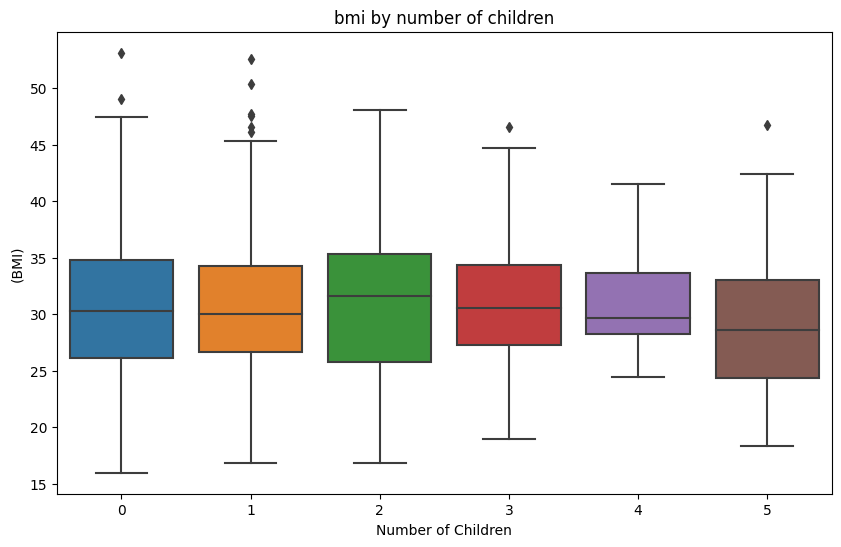

In [93]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=insurance_df,x='children', y='bmi')
plt.title("bmi by number of children")
plt.xlabel("Number of Children")
plt.ylabel("(BMI)")
plt.show()

*In our analysis, we couldn't identify a significant relationship between the number of children and Body Mass Index (BMI). Visualizations and statistical calculations showed that the number of children does not have a clear impact on BMI. This situation reflects the complexity of factors and multifaceted relationships within your dataset.

*As a result, the lack of a clear relationship between the number of children and BMI suggests the need to consider various factors and influencing variables. Performing a more detailed analysis while taking into account other features in your dataset and attempting to comprehend subtle relationships is essential. Such analyses can aid in understanding the intricacies of health, lifestyle, and social factors that might be at play*

**Is there an outlier in the "bmi" variable? Please review.**

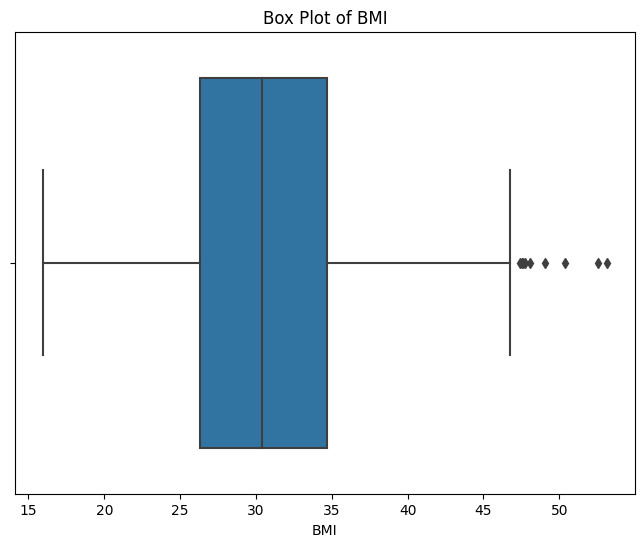

In [94]:
#looking for a outlier value  we should  create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=insurance_df,x='bmi')
plt.title("Box Plot of BMI")
plt.xlabel("BMI")
plt.show()

**Examine the relationship between “bmi” and “charges”.**

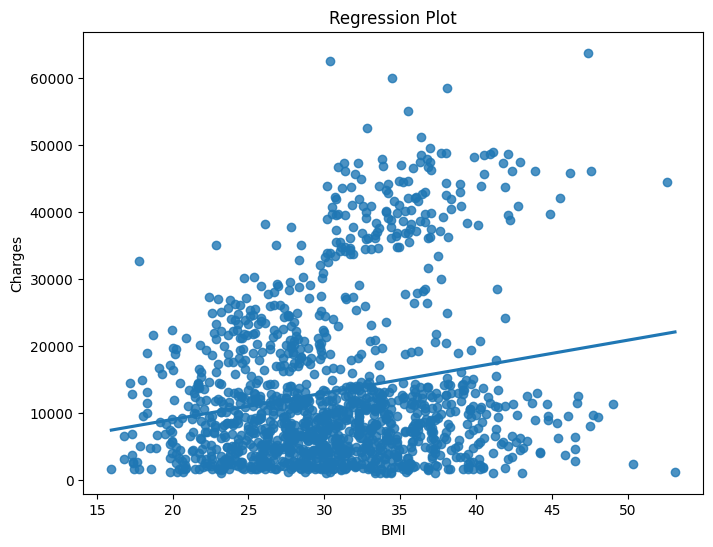

In [95]:
plt.figure(figsize=(8, 6))
sns.regplot(data=insurance_df,x='bmi', y='charges', ci=None)  # ci=None, güven aralığı göstermez
plt.title("Regression Plot")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

*According to regression plot observations,the slope of the plot is so low.In this case, the low slope of the regression line indicates that there is a very weak or almost negligible linear relationship between the variables. A low slope suggests that one variable has a minimal influence on the other, or that the variation between the variables is minimal.*
*Additionally, it might be necessary to assess the impact of other factors and conduct a more comprehensive analysis.*

**Examine the relationship between “region”, “smoker” and “bmi” using barplot**

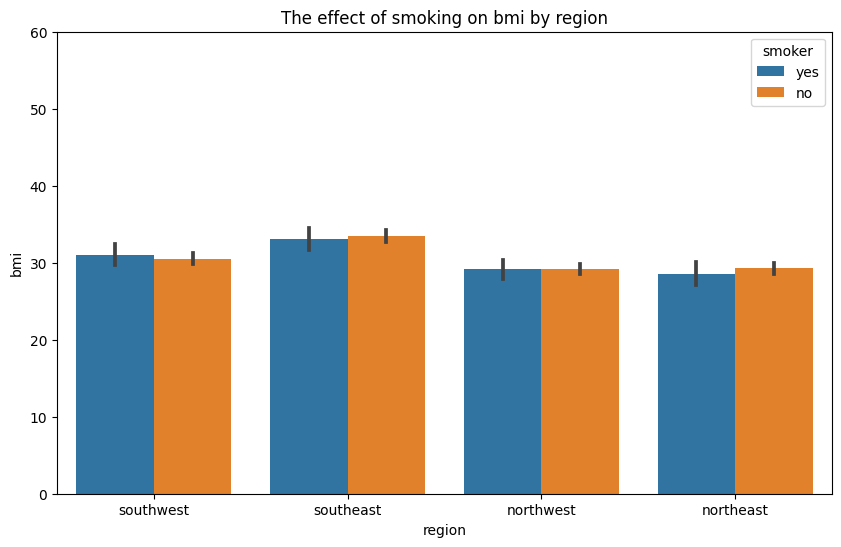

In [96]:
plt.figure(figsize=(10,6))
sns.barplot(data=insurance_df,x='region',y='bmi',hue='smoker',);
plt.title('The effect of smoking on bmi by region')
plt.yticks(range(0, 70, 10))
plt.show()

<ipython-input-97-e5ac7767b7b3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(insurance_df.corr(), annot=True);


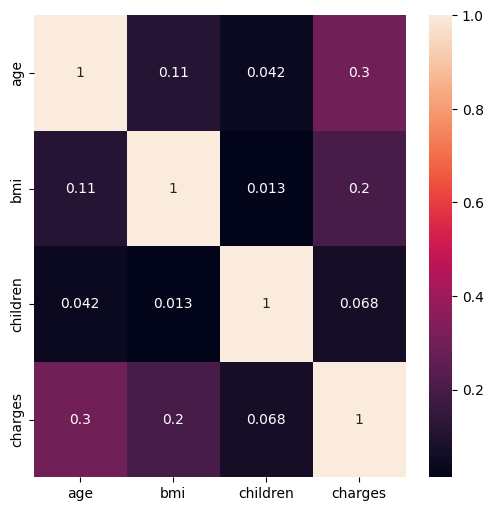

In [97]:
plt.figure(figsize=(6,6))
sns.heatmap(insurance_df.corr(), annot=True);

# DATA PREPROCESSING

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

**Label Encoding**

In [99]:
#It is used to transform  categorical variables to numerical variables for sex values.
label_encoder = LabelEncoder()
insurance_df['sex_encoded'] = label_encoder.fit_transform(insurance_df['sex'])
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges,sex_encoded
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


In [100]:
#It is used to transform  categorical variables to numerical variables for smoker values.
label_encoder = LabelEncoder()
insurance_df['smoker_encoded'] = label_encoder.fit_transform(insurance_df['smoker'])
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges,sex_encoded,smoker_encoded
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


**One-Hot Encoding**

In [101]:
#We do One-Hot Encoding with pandas' get_dummies function
region_encoded = pd.get_dummies(insurance_df['region'], prefix='region',drop_first=True)

#We add the created One-Hot Encoding columns to the main dataset
insurance_df = pd.concat([insurance_df, region_encoded], axis=1)

#Remove the original "region" column after adding One-Hot Encoding columns
insurance_df= insurance_df.drop('region', axis=1)
insurance_df.head()

,age,sex,bmi,children,smoker,charges,sex_encoded,smoker_encoded,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,0,1,0,0,1
1,18,male,33.770,1,no,1725.55230,1,0,0,1,0
2,28,male,33.000,3,no,4449.46200,1,0,0,1,0
3,33,male,22.705,0,no,21984.47061,1,0,1,0,0
4,32,male,28.880,0,no,3866.85520,1,0,1,0,0


In [102]:
#delete the sex and bmi columns in encoded dataframe
insurance_df = insurance_df.drop([ 'sex', 'smoker'], axis=1)
insurance_df.head(10)

,age,bmi,children,charges,sex_encoded,smoker_encoded,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
5,31,25.740,0,3756.62160,0,0,0,1,0
6,46,33.440,1,8240.58960,0,0,0,1,0
7,37,27.740,3,7281.50560,0,0,1,0,0
8,37,29.830,2,6406.41070,1,0,0,0,0
9,60,25.840,0,28923.13692,0,0,1,0,0


**Capping/Flooring**

In [103]:
Q1 = insurance_df['charges'].quantile(0.25)
Q3 = insurance_df['charges'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

insurance_df[(insurance_df['charges'] < lower_limit) | (insurance_df['charges'] > upper_limit)]

,age,bmi,children,charges,sex_encoded,smoker_encoded,region_northwest,region_southeast,region_southwest
14,27,42.130,0,39611.75770,1,1,0,1,0
19,30,35.300,0,36837.46700,1,1,0,0,1
23,34,31.920,1,37701.87680,0,1,0,0,0
29,31,36.300,2,38711.00000,1,1,0,0,1
30,22,35.600,0,35585.57600,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...
1300,45,30.360,0,62592.87309,1,1,0,1,0
1301,62,30.875,3,46718.16325,1,1,1,0,0
1303,43,27.800,0,37829.72420,1,1,0,0,1
1313,19,34.700,2,36397.57600,0,1,0,0,1


*As seen above, there are exactly 139 different outliers belonging to the charges variable. Now we will limit these outliers by equating them to the threshold values ​​we found.*

In [104]:
#The lower threshold of our outlier
Q1

4740.28715

In [105]:
#The higher threshold of our outlier
Q3

16639.912515

In [106]:
#interquartile
IQR

11899.625365

In [107]:
Q1 = 4740.28715
Q3 = 16639.912515
IQR = 11899.625365

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# flooring/capping
insurance_df["charges"] = np.clip(insurance_df["charges"], lower_bound, upper_bound)
# Let's see if the code we wrote has limitations, let's test it now
insurance_df[(insurance_df['charges'] < lower_limit) | (insurance_df['charges'] > upper_limit)]

,age,bmi,children,charges,sex_encoded,smoker_encoded,region_northwest,region_southeast,region_southwest


*
As it seems, we suppressed the outliers of the charges variable, that is, we wrote the lower and upper threshold values ​​instead. Therefore, we no longer encounter any data that indicates a value between these values. Now let's perform the same operations for "bmi".*

In [108]:
Q1 = insurance_df['bmi'].quantile(0.25)
Q3 = insurance_df['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

insurance_df[(insurance_df['bmi'] < lower_limit) | (insurance_df['bmi'] > upper_limit)]

,age,bmi,children,charges,sex_encoded,smoker_encoded,region_northwest,region_southeast,region_southwest
116,58,49.06,0,11381.325400,1,0,0,1,0
286,46,48.07,2,9432.925300,0,0,0,0,0
401,47,47.52,1,8083.919800,1,0,0,1,0
543,54,47.41,0,34489.350562,0,1,0,1,0
847,23,50.38,1,2438.055200,1,0,0,1,0
860,37,47.60,2,34489.350562,0,1,0,0,1
1047,22,52.58,1,34489.350562,1,1,0,1,0
1088,52,47.74,1,9748.910600,1,0,0,1,0
1317,18,53.13,0,1163.462700,1,0,0,1,0


*We also suppressed our bmi variable*

In [109]:
# Independent variable (X)
X =insurance_df[['bmi', 'age', 'children', 'sex_encoded', 'smoker_encoded', 'region_northwest', 'region_southeast', 'region_southwest']]
#dependent variable(y)
y=insurance_df['charges']

In [110]:
scaler=MinMaxScaler()
X= scaler.fit_transform(X)

In [111]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# Model Selection

In [112]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [113]:
decision_tree=DecisionTreeRegressor()

In [114]:
decision_tree.fit(X_train, y_train)
decision_tree_pred = decision_tree.predict(X_test)


In [115]:
print('Mean Squared Error of DecisionTreeRegressor:',mean_squared_error(y_test,decision_tree_pred))
print('r2 score of DecisionTreeRegressor:', decision_tree.score(X_test,y_test))
print('Mean Absolute Error Of DecisionTreeRegressor',mean_absolute_error(y_test, decision_tree_pred))

Mean Squared Error of DecisionTreeRegressor: 38851064.892284535
r2 score of DecisionTreeRegressor: 0.6349440898295318
Mean Absolute Error Of DecisionTreeRegressor 2904.28734584515


In [120]:
# Create a Random Forest Regressor instance
rfr = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to your training data
rfr.fit(X_train, y_train)

# Make predictions
rfr_pred = rfr.predict(X_test)

In [122]:
a=mean_squared_error(y_test,rfr_pred)
print('Mean Squared Error of RandomForestRegressor:',a)
print('r2 score ofRandomForestRegressor: ',r2_score(y_test,rfr_pred))
print('Mean Absolute Error Of RandomForestRegressor',mean_absolute_error(y_test, rfr_pred))

Mean Squared Error of RandomForestRegressor: 16299063.657510562
r2 score ofRandomForestRegressor:  0.8468492553572052
Mean Absolute Error Of RandomForestRegressor 2331.5139157372205


In [123]:
linear_regression= LinearRegression()

In [124]:
linear_regression.fit(X_train,y_train)
linear_regression_pred=linear_regression.predict(X_test)

In [125]:
print('Mean Squared Error of LinearRegression:',mean_squared_error(y_test,linear_regression_pred))
print('r2 score of LinearRegression:',linear_regression.score(X_test,y_test))
print('Mean Absolute Error Of Linearregression',mean_absolute_error(y_test, linear_regression_pred))

Mean Squared Error of LinearRegression: 21884414.984098513
r2 score of LinearRegression: 0.7943676691303547
Mean Absolute Error Of Linearregression 3057.072862387752


In [126]:
# Create a Gradient Boosting Regressor model
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=0)

# Train the model
gb_regressor.fit(X_train, y_train)

# Make predictions on the test data
gb_pred = gb_regressor.predict(X_test)

In [127]:
print('Mean Squared Error of GradientBoostingRegressor:',mean_squared_error(y_test,gb_pred))
print('r2 score of GradientBoostingRegressor:',gb_regressor.score(X_test,y_test))
print('Mean Absolute Error Of GradientBoostingRegressor:',mean_absolute_error(y_test, gb_pred))

Mean Squared Error of GradientBoostingRegressor: 15092651.320617136
r2 score of GradientBoostingRegressor: 0.8581850567028453
Mean Absolute Error Of GradientBoostingRegressor: 2268.2538097611505


In [128]:
model = XGBRegressor(max_depth = 3, n_estimators = 50, learning_rate = 0.2)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(y_pred[:5])
print(y_test[:5])

[11981.633  9843.116 36164.6   14807.125 10822.243]
578      9724.530000
610      8547.691300
569     34489.350562
1034    12950.071200
198      9644.252500
Name: charges, dtype: float64


In [131]:
print('Mean Squared Error of XGBRegressor:',mean_squared_error(y_test,y_pred))
print('r2 score of XGBRegressor:',model.score(X_test,y_test))
print('Mean Absolute Error Of XGBRegressor',mean_absolute_error(y_test, y_pred))


Mean Squared Error of XGBRegressor: 14878059.121427352
r2 score of XGBRegressor: 0.8602014274460387
Mean Absolute Error Of XGBRegressor 2250.2072410155374


# Improving Model and Evaluation

**Cross Validation**

In [132]:
# Perform cross-validation on XGBREGRESSOR
cv_scores = cross_val_score(model, X, y, scoring="r2", cv=5)

print("Cross-Validation R2 Scores:", cv_scores)
print("Mean R2 Score:", cv_scores.mean())

Cross-Validation R2 Scores: [0.83315119 0.74129291 0.86860705 0.80752592 0.83674103]
Mean R2 Score: 0.8174636209573304


# Hyper Parameter Optimization

In [136]:
#tuning for xgbregressor
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
              'subsample'    : [0.9, 0.5, 0.2, 0.1],
              'n_estimators' : [100,500,1000, 1500],
              'max_depth'    : [4,6,8,10]
                 }
grid_xgb = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.2, ma...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=3, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=50,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [137]:
print('best parameters:',grid_xgb.best_params_)

best parameters: {'learning_rate': 0.04, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.9}


In [142]:
xgb_regressor=XGBRegressor(learning_rate=0.04,n_estimators=100,max_depth=4,subsample=0.9)
xgb_regressor.fit(X_train,y_train)
xgb_pred=xgb_regressor.predict(X_test)


0.8650351090149043

In [157]:
print('Mean Squared Error of XGBRegressor:',mean_squared_error(y_test,xgb_pred))
print('r2 score of XGBRegressor:',r2_score(y_test,xgb_pred))
print('Mean Absolute Error Of XGBRegressor',mean_absolute_error(y_test, xgb_pred))


Mean Squared Error of XGBRegressor: 14363634.697472824
r2 score of XGBRegressor: 0.8650351090149043
Mean Absolute Error Of XGBRegressor 2143.2017208626394


*as you can see after the hyper parameter optimization our r2 score of xgb regressor is increased 0.8650351090149043*

In [145]:
#tuning for gradient boosting regressor
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
              'subsample'    : [0.9, 0.5, 0.2, 0.1],
              'n_estimators' : [100,500,1000, 1500],
              'max_depth'    : [4,6,8,10]
                 }
grid_grad_regressor = GridSearchCV(estimator=gb_regressor, param_grid = parameters, cv = 2, n_jobs=-1)
grid_grad_regressor.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [146]:
print('best parameters:',grid_grad_regressor.best_params_)

best parameters: {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.9}


In [155]:
gb_regressor=GradientBoostingRegressor(learning_rate=0.04,n_estimators=100,max_depth=4,subsample=0.9)
gb_regressor.fit(X_train,y_train)
gb_pred=gb_regressor.predict(X_test)


In [154]:
print('Mean Squared Error of GradientBoostingRegressor:',mean_squared_error(y_test,gb_pred))
print('r2 score of GradientBoostingRegressor:',gb_regressor.score(X_test,y_test))
print('Mean Absolute Error Of GradientBoostingRegressor:',mean_absolute_error(y_test, gb_pred))

Mean Squared Error of GradientBoostingRegressor: 14572437.00870574
r2 score of GradientBoostingRegressor: 0.8630731417436297
Mean Absolute Error Of GradientBoostingRegressor: 2282.0103698539947


*as you can see after the hyper parameter optimization our r2 score of gradient boosting regressor is increased  0.8630731417436297*

In [149]:
#tuning for random forest regressor
n_estimators = (100,200)
max_depth = range(3,21)
random_state =range(1,8)

params = {"max_depth":max_depth, "random_state":random_state, "n_estimators":n_estimators}

rfr_grid = GridSearchCV(rfr, param_grid=params,
                         cv = 5,
                         verbose = 1,
                         n_jobs = -1)

rfr_grid.fit(X_train, y_train)


print('best parameters:',rfr_grid.best_params_)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits
best parameters: {'max_depth': 4, 'n_estimators': 100, 'random_state': 3}


In [153]:
rfr=RandomForestRegressor(n_estimators=100,max_depth=4,random_state=3)
rfr.fit(X_train,y_train)
rfr_pred=rfr.predict(X_test)
print('r2 score of Random Forest Regressor:',r2_score(y_test,rfr_pred))
print('Mean Squared Error of RandomForestRegressor:',mean_squared_error(y_test,rfr_pred))
print('Mean Absolute Error Of RandomForestRegressor',mean_absolute_error(y_test, rfr_pred))

r2 score of Random Forest Regressor: 0.8680495148123561
Mean Squared Error of RandomForestRegressor: 14042826.645923158
Mean Absolute Error Of RandomForestRegressor 2109.474448461161


*as you can see after the hyper parameter optimization our r2 score of random forest regressor is increased 0.8680495148123561*

In [163]:
compare_df = pd.DataFrame()

dict = {'linear':linear_regression.score(X_test,y_test),
                          'RF': rfr.score(X_test,y_test),
                           'gradient boosting':gb_regressor.score(X_test,y_test),
                            'xgb regressor':r2_score(y_test,xgb_pred),
        'decision tree':decision_tree.score(X_test,y_test)


                                   }
compare_df.append(dict,ignore_index=True)

<ipython-input-163-b2e13d42f8e4>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare_df.append(dict,ignore_index=True)


,linear,RF,gradient boosting,xgb regressor,decision tree
0,0.794368,0.86805,0.86208,0.865035,0.634944
